In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
sns.set_context("poster")


from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [5]:
def go_back(look_back, df):
    #Create previous Day price column 
    
    for i in range(look_back):
        name = 'Previous_Day_Price' + str(i)
        df[name] = df['Weighted_Price'].shift(+1+i)
        df.dropna(how='any', inplace=True)
        
    return df

def run(dataset, look_back, params):

    #Go back
    df = go_back(look_back, dataset)
    df = df.values

    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    df = scaler.fit_transform(df)

    dataset = np.delete(df,(0), axis=1)
    labels = np.delete(df,(1,2,3,4,5,6,7,8,9), axis=1).ravel()

    x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2, shuffle = False)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, shuffle = False)

    
    #Regressor
    rgr =  GradientBoostingRegressor(**params)
    rgr.fit(x_train, y_train)

    prediction = rgr.predict(x_train)
    print('\n Train Score: %.5f RMSE' % math.sqrt(mean_squared_error(prediction,y_train)))

    prediction = rgr.predict(x_test)
    print('\n Test Score: %.5f RMSE' % math.sqrt(mean_squared_error(prediction,y_test)))
    
    #plot the values
    plt.figure(figsize=(20,10))
    plt.title('Gradient Boosting Prediction vs Real values')
    plt.plot(prediction, label='Prediction')
    plt.plot(y_test, label='Real Price')
    plt.legend()
    plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.



 Train Score: 0.00031 RMSE

 Test Score: 0.02030 RMSE


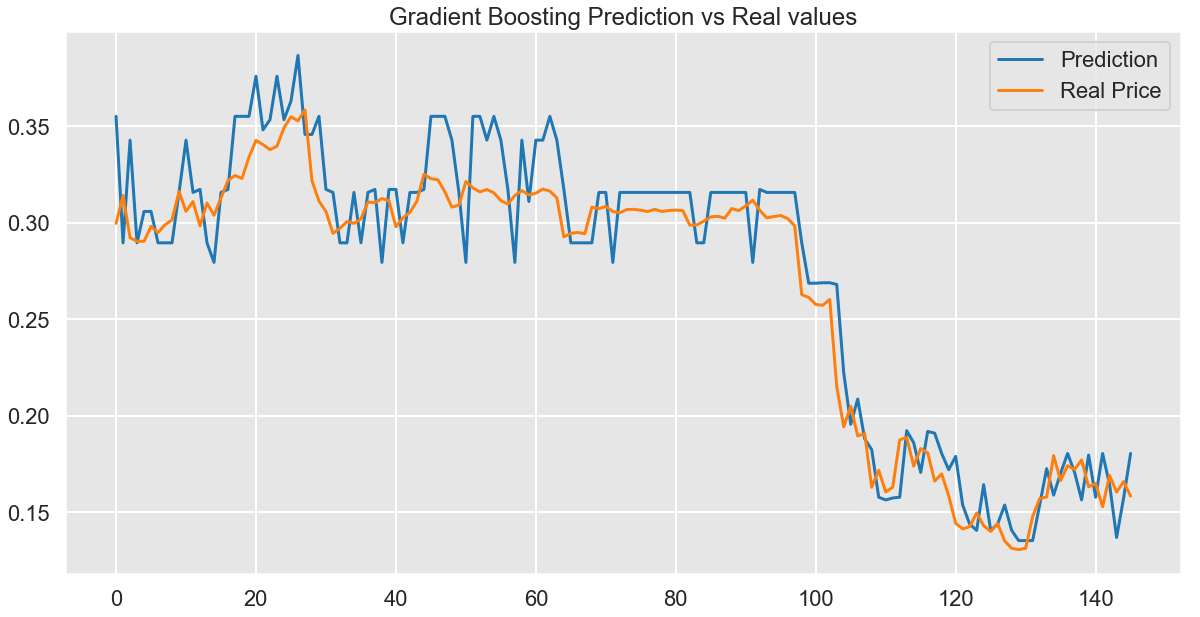

In [15]:
params = {
 
    'max_depth': 15,
    'min_weight_fraction_leaf': 0.000864083899010021,

    }


df = pd.read_csv('fulldata.csv')
#Drop np.nan
df.dropna(how='any', inplace=True)

df = df[['Weighted_Price']]

rgr = run(df,1, params)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.



 Train Score: 0.00031 RMSE

 Test Score: 0.02206 RMSE


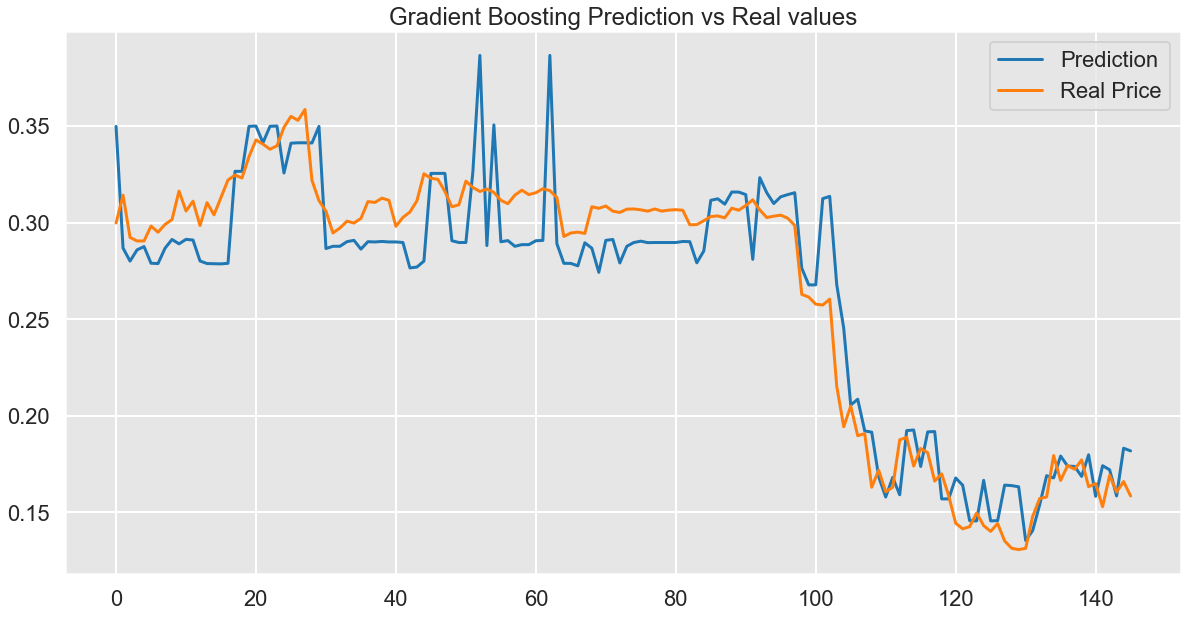

In [17]:
params = {
 
    'max_depth': 11,
    'min_weight_fraction_leaf': 0.00048249033717840035,

    }


df = pd.read_csv('fulldata.csv')
#Drop np.nan
df.dropna(how='any', inplace=True)

df = df[['Weighted_Price', 'Polarity_Textblob','Trend_Values', 'Polarity_Vader']]

rgr = run(df,1, params)